In [94]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [95]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [96]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [97]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [98]:
cols=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=cols,inplace=True)


In [99]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [100]:
df.loc[df["v1"] == "spam", "v1"] = 0
df.loc[df["v1"] == "ham", "v1"] = 1


In [101]:
df['v1'].value_counts()

1    4825
0     747
Name: v1, dtype: int64

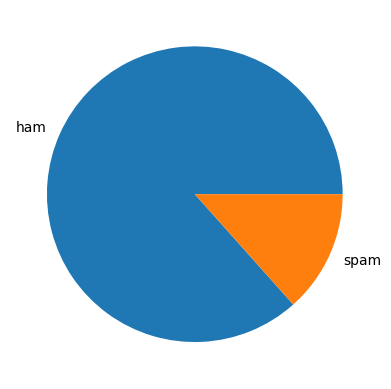

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['v1'].value_counts(),labels=['ham','spam'])
plt.show()

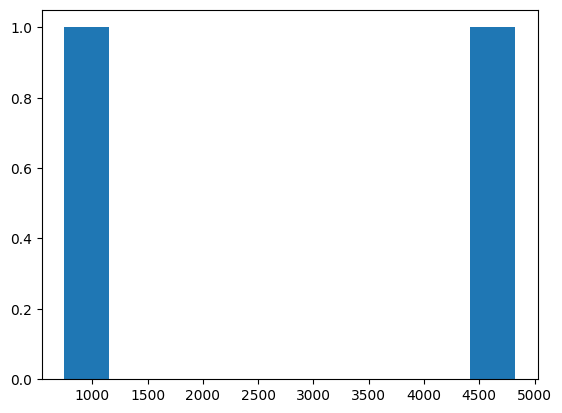

In [103]:
plt.hist(df['v1'].value_counts())
plt.show()

/tmp/ipykernel_32075/2433022610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tips.corr()


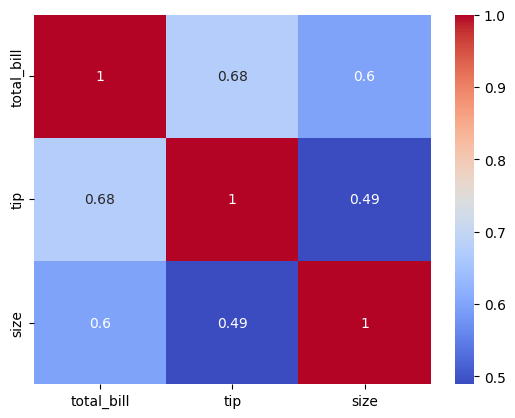

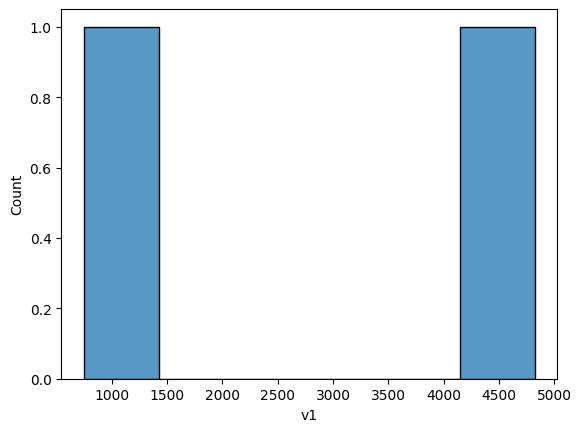

In [115]:
sns.histplot(df['v1'].value_counts(),bins=6)
plt.show()

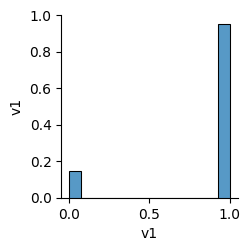

In [117]:
sns.pairplot(df)


<Axes: xlabel='v1', ylabel='count'>

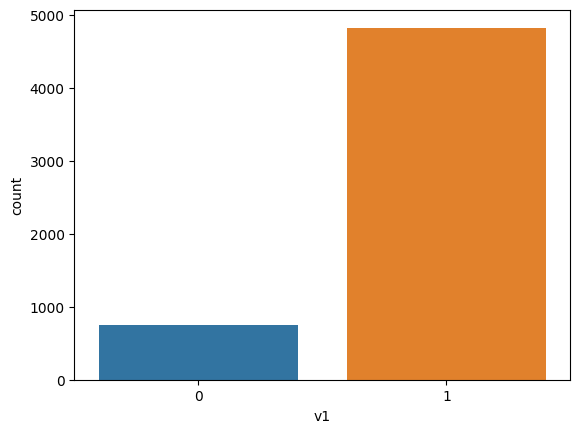

In [118]:
sns.countplot(x='v1',data=df)

In [105]:
x=df["v2"]
y=df["v1"]


In [106]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=20,test_size=0.4)


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [108]:
X_train = feature_extraction.fit_transform(train_x)
X_test = feature_extraction.transform(test_x)

In [109]:
Y_train = train_y.astype("int")
Y_test = test_y.astype("int")

In [110]:
print(X_train)

  (0, 5133)	0.44558862892963985
  (0, 2722)	0.3157762317313713
  (0, 2428)	0.3910689902569368
  (0, 4538)	0.40705987000947813
  (0, 5134)	0.44558862892963985
  (0, 4323)	0.42959774917709853
  (1, 3864)	0.41040575178745226
  (1, 1252)	0.6974006065529974
  (1, 2579)	0.34042673329449974
  (1, 2312)	0.4788623519736363
  (2, 3841)	0.6128083960429517
  (2, 3723)	0.4956980514059292
  (2, 6009)	0.4319947890692082
  (2, 6239)	0.4383261500169482
  (3, 3924)	0.7851573984011597
  (3, 3972)	0.6192962616841172
  (4, 6202)	0.2954502503825781
  (4, 269)	0.27707284846182684
  (4, 2461)	0.3931719746084137
  (4, 5515)	0.3931719746084137
  (4, 256)	0.2603515929299544
  (4, 1645)	0.2954502503825781
  (4, 594)	0.3931719746084137
  (4, 978)	0.4130586186574439
  (4, 5508)	0.21562921068861612
  :	:
  (3340, 2267)	0.3095377553249362
  (3340, 5072)	0.27283957889953725
  (3340, 3704)	0.24312439503231653
  (3340, 3487)	0.2091894382727373
  (3340, 2888)	0.293298553558416
  (3340, 3345)	0.2540155577601346
  (3340, 5

In [111]:
print(Y_train)

511     1
5445    1
2757    1
5534    1
3560    0
       ..
1607    1
3915    1
1428    1
4367    1
2522    1
Name: v1, Length: 3343, dtype: int64


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression()
model.fit(X_train, Y_train)
predict=model.predict(X_test)
accuracy=accuracy_score(Y_test,predict)
print(accuracy)

0.9510991475998205
